<a href="https://colab.research.google.com/github/jshuaaaa/TensorFlow-Notebook/blob/main/03_intro_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutiuonal Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car infront of it

## Get the data

The images are from the Food101 dataset: (https://www.kaggle.com/datasets/dansbecker/food-101)

data already preprocessed here : (https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

however we modified it to only use two classes (pizza & steak)

**Note:** We start with a smaller dataset so we can experiment quickly to find out what works and what doesnt before we scale up our complexity of our data

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-19 23:12:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.128, 74.125.201.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   144MB/s    in 0.7s    

2023-02-19 23:12:33 (144 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with the data)

A very crucial step at the begining of any machine learnign project is becoming one with the data.

For a computer vision project... this usually entails visualizing our samples of data


In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directoriers and {len(filenames)} images in '{dirpath}'")


There are 2 directoriers and 0 images in 'pizza_steak'
There are 2 directoriers and 0 images in 'pizza_steak/test'
There are 0 directoriers and 250 images in 'pizza_steak/test/pizza'
There are 0 directoriers and 250 images in 'pizza_steak/test/steak'
There are 2 directoriers and 0 images in 'pizza_steak/train'
There are 0 directoriers and 750 images in 'pizza_steak/train/pizza'
There are 0 directoriers and 750 images in 'pizza_steak/train/steak'


In [6]:
#Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first lets get the class names programmatically.

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (well view images from here)
  target_folder = target_dir+ "/" + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using mat plotlib

  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show shape of image

  return img

Image shape: (512, 512, 3)


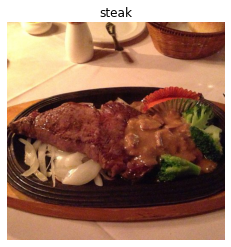

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train",
                        target_class="steak")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[248, 212, 162],
        [249, 213, 161],
        [246, 210, 158],
        ...,
        [145,  73,  49],
        [139,  67,  45],
        [140,  65,  46]],

       [[253, 220, 167],
        [254, 221, 168],
        [254, 221, 167],
        ...,
        [152,  80,  56],
        [146,  74,  52],
        [141,  66,  47]],

       [[254, 221, 167],
        [255, 222, 168],
        [255, 225, 168],
        ...,
        [159,  87,  63],
        [153,  81,  59],
        [142,  70,  48]],

       ...,

       [[225, 169, 120],
        [222, 166, 117],
        [221, 165, 116],
        ...,
        [189, 136, 118],
        [187, 131, 114],
        [187, 131, 114]],

       [[227, 171, 122],
        [223, 167, 118],
        [222, 166, 117],
        ...,
        [195, 139, 126],
        [187, 131, 116],
        [195, 139, 124]],

       [[221, 165, 116],
        [219, 163, 114],
        [222, 166, 117],
        ...,
        [186, 129, 11

In [11]:
# View the image shape
img.shape # returns width, height, color channels

(512, 512, 3)

In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.97254902, 0.83137255, 0.63529412],
        [0.97647059, 0.83529412, 0.63137255],
        [0.96470588, 0.82352941, 0.61960784],
        ...,
        [0.56862745, 0.28627451, 0.19215686],
        [0.54509804, 0.2627451 , 0.17647059],
        [0.54901961, 0.25490196, 0.18039216]],

       [[0.99215686, 0.8627451 , 0.65490196],
        [0.99607843, 0.86666667, 0.65882353],
        [0.99607843, 0.86666667, 0.65490196],
        ...,
        [0.59607843, 0.31372549, 0.21960784],
        [0.57254902, 0.29019608, 0.20392157],
        [0.55294118, 0.25882353, 0.18431373]],

       [[0.99607843, 0.86666667, 0.65490196],
        [1.        , 0.87058824, 0.65882353],
        [1.        , 0.88235294, 0.65882353],
        ...,
        [0.62352941, 0.34117647, 0.24705882],
        [0.6       , 0.31764706, 0.23137255],
        [0.55686275, 0.2745098 , 0.18823529]],

       ...,

       [[0.88235294, 0.6627451 , 0.47058824],
        [0.87058824, 0.65098039, 0.45882353],
        [0.86666667, 0

**Note:** As we saw before, many ML models, including neural networks prefer the values they work with to be between 0 and 1. Knwoing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

## An end-to-end example of a CNN Models

Lets builds a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patters in our images
* Compile our CNN
* Fit the CNN to our training data


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42
                                                )
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)


# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 229ms/step - loss: 0.5897 - accuracy: 0.6680 - val_loss: 0.4206 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4438 - accuracy: 0.7933 - val_loss: 0.3662 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3816 - accuracy: 0.8333 - val_loss: 0.3143 - val_accuracy: 0.8880
Epoch 4/5
47/47 [==============================] - 10s 217ms/step - loss: 0.2963 - accuracy: 0.8787 - val_loss: 0.2958 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.2547 - accuracy: 0.8987 - val_loss: 0.3371 - val_accuracy: 0.8420


**Note:** always remember to change runtime type to GPU as it increases speed of model training significantly!

## Using the same model as before


In [18]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 245ms/step - loss: 0.6968 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 203ms/step - loss: 0.6932 - accuracy: 0.4907 - val_loss: 0.6931 - val_accuracy: 0.5000


Lets improve model_2 to improve better

In [25]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 195ms/step - loss: 2.8820 - accuracy: 0.5993 - val_loss: 0.7571 - val_accuracy: 0.6820
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6124 - accuracy: 0.7267 - val_loss: 0.4590 - val_accuracy: 0.7760
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6902 - accuracy: 0.7173 - val_loss: 0.6835 - val_accuracy: 0.6340
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6803 - accuracy: 0.7153 - val_loss: 0.5821 - val_accuracy: 0.7500
Epoch 5/5
47/47 [==============================] - 9s 193ms/step - loss: 0.7480 - accuracy: 0.7127 - val_loss: 0.5691 - val_accuracy: 0.7460


In [26]:
model_3.summary(
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_30 (Dense)            (None, 100)               15052900  
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                                 
 dense_33 (Dense)            (None, 100)               10100     
                                                                 
 dense_34 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,083,301
Trainable params: 15,083,301


In [28]:
model_1.summary(
    
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

#### Our model 3 had almost 500x trainable params which is a problem and we are going to dive deeper into what this means